In [3]:
import pandas as pd


# Replace 'filename.csv' with the path to your CSV file
df = pd.read_csv(r'C:\Users\sunit\Desktop\project\netflix.csv')

print(df)


                       title rating  \
0               White Chicks  PG-13   
1        Lucky Number Slevin      R   
2             Grey's Anatomy  TV-14   
3               Prison Break  TV-14   
4      How I Met Your Mother  TV-PG   
..                       ...    ...   
995                  The BFG     PG   
996  The Secret Life of Pets     PG   
997         Precious Puppies   TV-G   
998              Beary Tales   TV-G   
999          Growing Up Wild      G   

                                           ratinglevel  ratingdescription  \
0    crude and sexual humor, language and some drug...                 80   
1    strong violence, sexual content and adult lang...                100   
2    Parents strongly cautioned. May be unsuitable ...                 90   
3    Parents strongly cautioned. May be unsuitable ...                 90   
4    Parental guidance suggested. May not be suitab...                 70   
..                                                 ...               

# 1) What is the count of content by rating (e.g., TV-14, PG-13, R)? and use pie chart


In [4]:
rating_counts = df['rating'].value_counts()

# Display the counts
print(rating_counts)

rating
TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
Name: count, dtype: int64


(-1.0999998552971633,
 1.0999998925436338,
 -1.0999970000412156,
 1.0999998556751986)

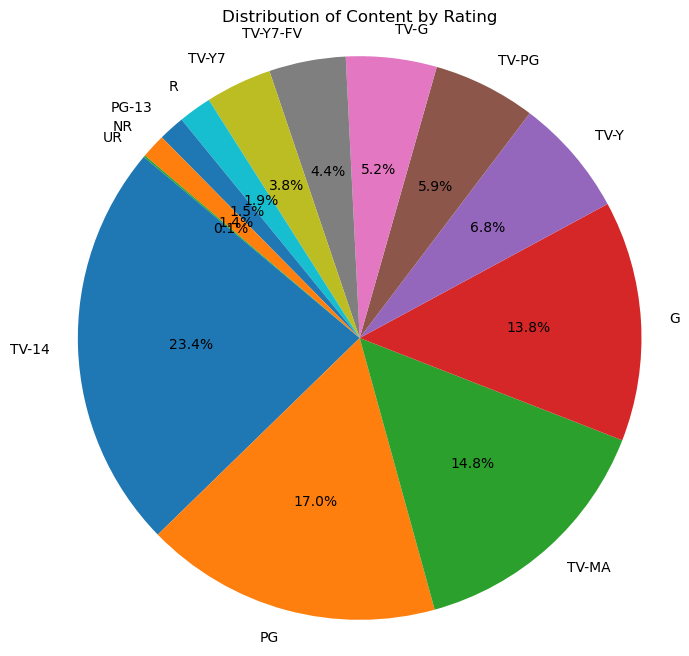

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content by Rating')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular 

# 2)What are the top 10 most common rating levels (e.g., "Parents strongly cautioned")?

In [7]:



top_ratings = df['rating'].value_counts().head(10)

print(top_ratings)

rating
TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
Name: count, dtype: int64


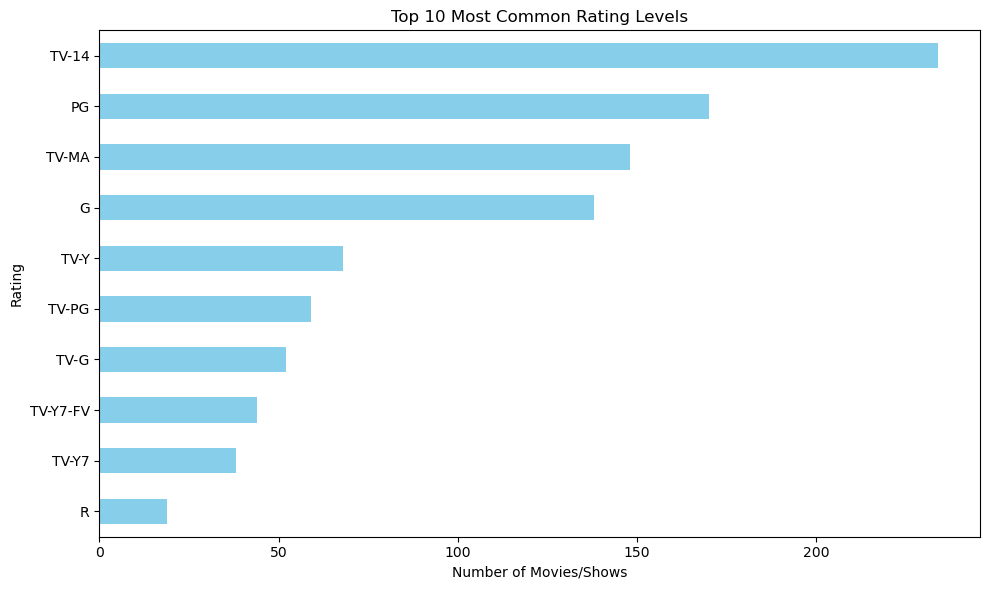

In [8]:
plt.figure(figsize=(10, 6))
top_ratings.sort_values().plot(kind='barh', color='skyblue')


plt.xlabel("Number of Movies/Shows")
plt.ylabel("Rating")
plt.title("Top 10 Most Common Rating Levels")
plt.tight_layout()


plt.show()

# 3)Which years have the most content releases? Line Plot



In [10]:

print(df.columns)  
year_counts = df['release_year'].value_counts().sort_index()

print(year_counts.sort_values(ascending=False).head(10))

Index(['title', 'rating', 'ratinglevel', 'ratingdescription', 'release_year',
       'user_rating_score', 'user_rating_size'],
      dtype='object')
release_year
2016    292
2015    109
2017    100
2014     58
2013     57
2012     45
1997     28
1998     26
2008     22
2011     21
Name: count, dtype: int64


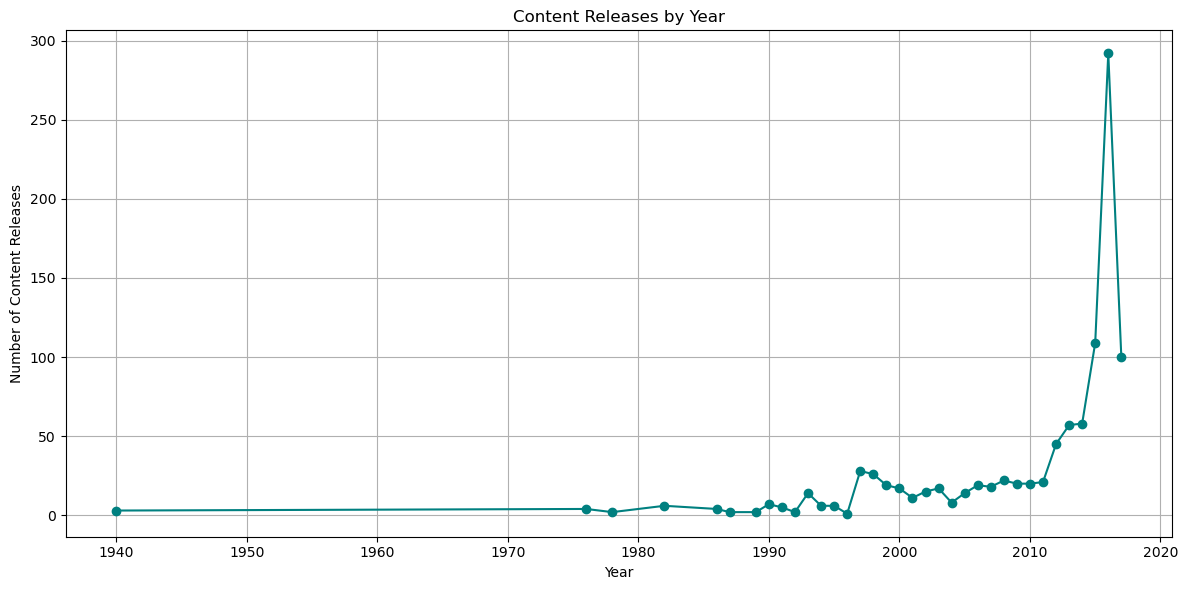

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='teal')

plt.xlabel("Year")
plt.ylabel("Number of Content Releases")
plt.title("Content Releases by Year")
plt.grid(True)
plt.tight_layout()


plt.show()

# 4)How has the user rating score trend changed over time?Scatter Plot grouped by release_year



Index(['title', 'rating', 'ratinglevel', 'ratingdescription', 'release_year',
       'user_rating_score', 'user_rating_size'],
      dtype='object')


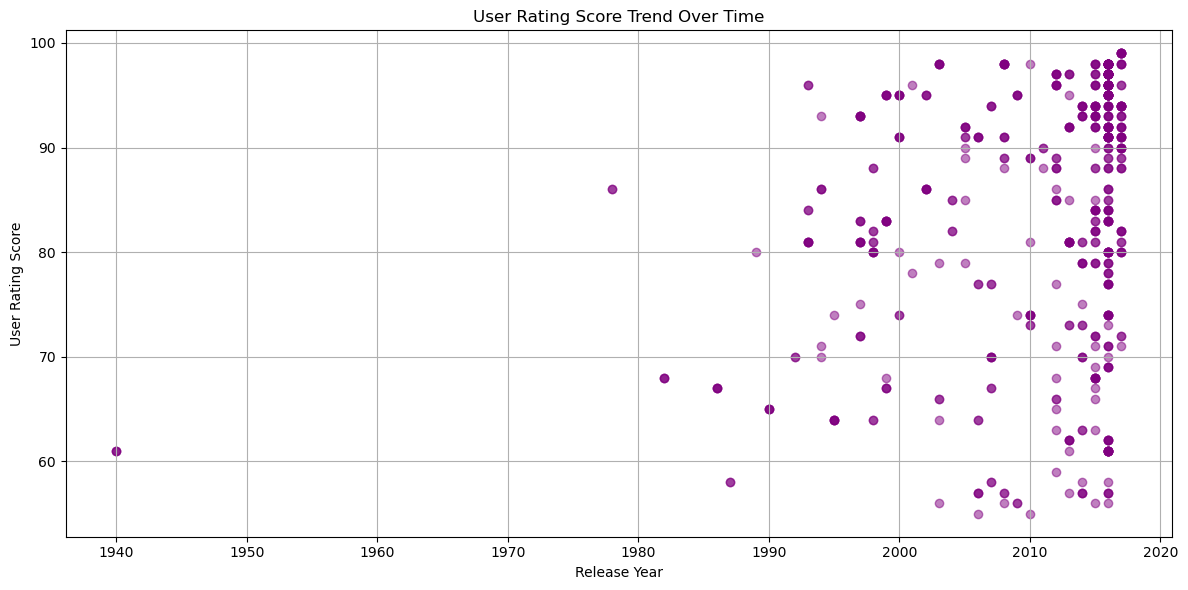

In [12]:
print(df.columns)  

df_clean = df[['release_year', 'user_rating_score']].dropna()


df_clean['release_year'] = df_clean['release_year'].astype(int)


plt.figure(figsize=(12, 6))
plt.scatter(df_clean['release_year'], df_clean['user_rating_score'], alpha=0.5, color='purple')


plt.xlabel("Release Year")
plt.ylabel("User Rating Score")
plt.title("User Rating Score Trend Over Time")
plt.grid(True)
plt.tight_layout()

plt.show()

# 5)What is the distribution of user rating scores? Use Histogram


Index(['title', 'rating', 'ratinglevel', 'ratingdescription', 'release_year',
       'user_rating_score', 'user_rating_size'],
      dtype='object')


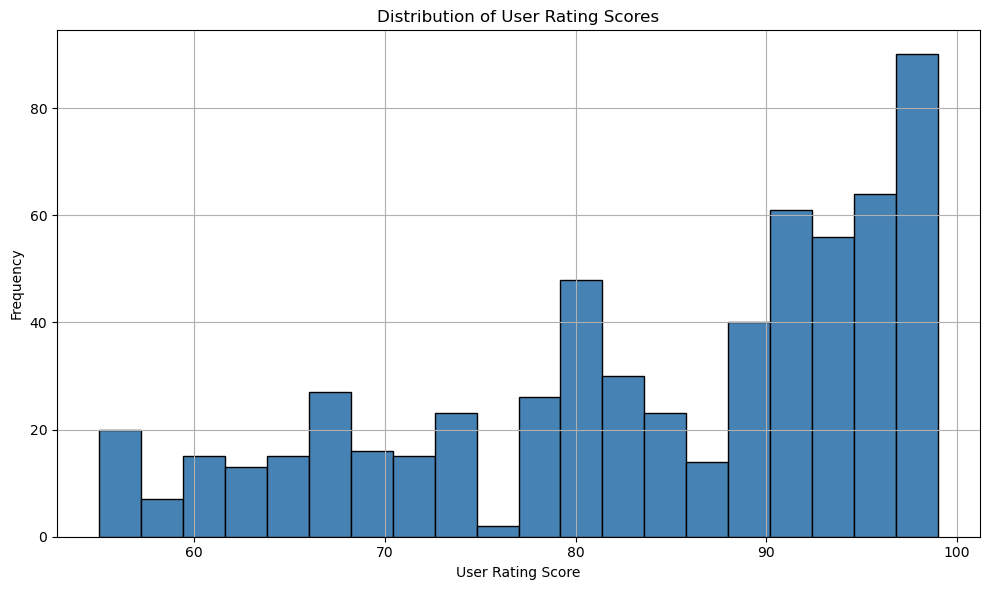

In [13]:
print(df.columns) 


df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')
df_clean = df['user_rating_score'].dropna()


plt.figure(figsize=(10, 6))
plt.hist(df_clean, bins=20, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel("User Rating Score")
plt.ylabel("Frequency")
plt.title("Distribution of User Rating Scores")
plt.grid(True)
plt.tight_layout()


plt.show()

# 6)What is the average user_rating_score per rating level (e.g., PG-13, R)?Plot with average values


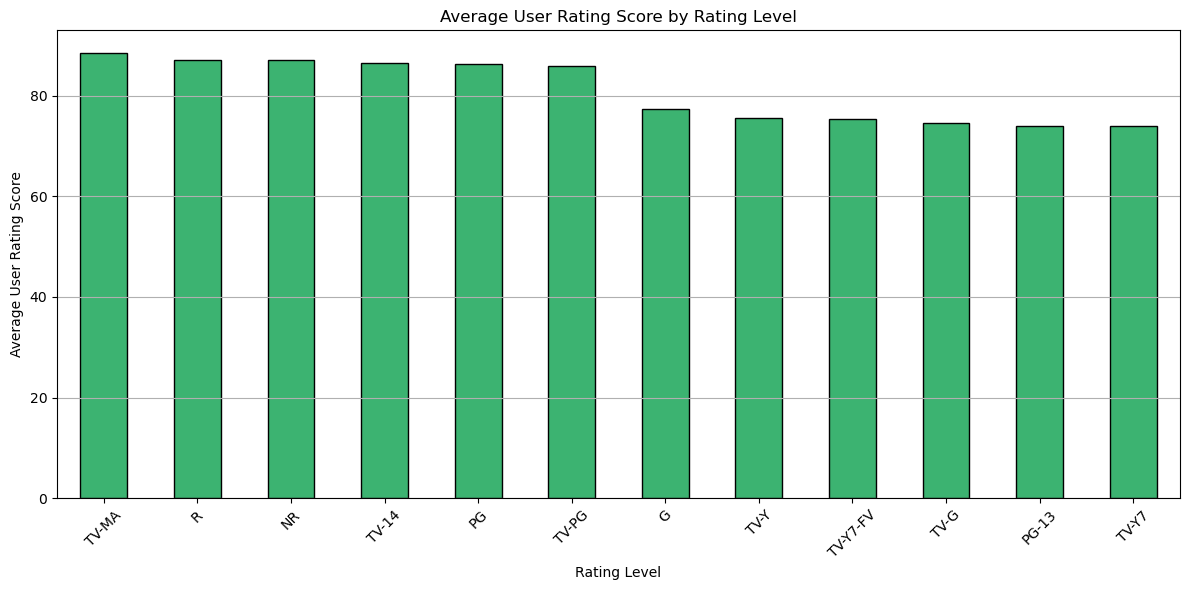

In [14]:
df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')


df_clean = df[['rating', 'user_rating_score']].dropna()


avg_scores = df_clean.groupby('rating')['user_rating_score'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_scores.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.xlabel("Rating Level")
plt.ylabel("Average User Rating Score")
plt.title("Average User Rating Score by Rating Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Show plot
plt.show()

# 7)Which rating has the highest average rating score? Bar Plot sorted by mean score


📌 Highest average rating score: TV-MA with score 88.52


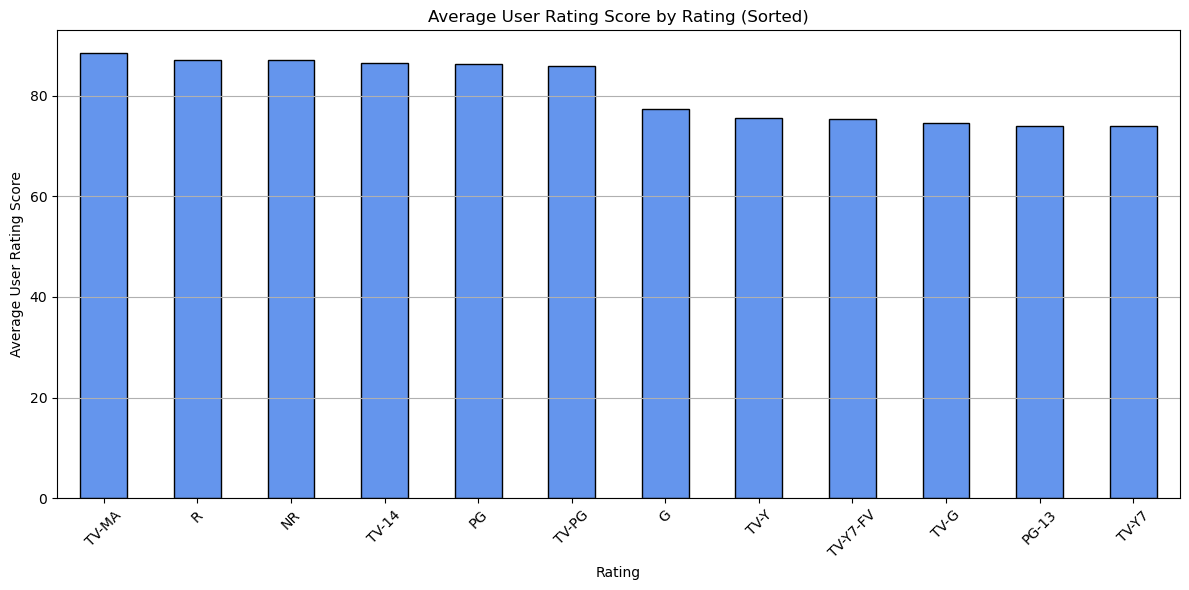

In [15]:

df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')


df_clean = df[['rating', 'user_rating_score']].dropna()


avg_scores = df_clean.groupby('rating')['user_rating_score'].mean().sort_values(ascending=False)


top_rating = avg_scores.idxmax()
top_score = avg_scores.max()
print(f"📌 Highest average rating score: {top_rating} with score {top_score:.2f}")


plt.figure(figsize=(12, 6))
avg_scores.plot(kind='bar', color='cornflowerblue', edgecolor='black')


plt.xlabel("Rating")
plt.ylabel("Average User Rating Score")
plt.title("Average User Rating Score by Rating (Sorted)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


plt.show()

# 8) What is the distribution of content rating scores (80, 90, 100, etc.)?Pie Chart or Count Plot


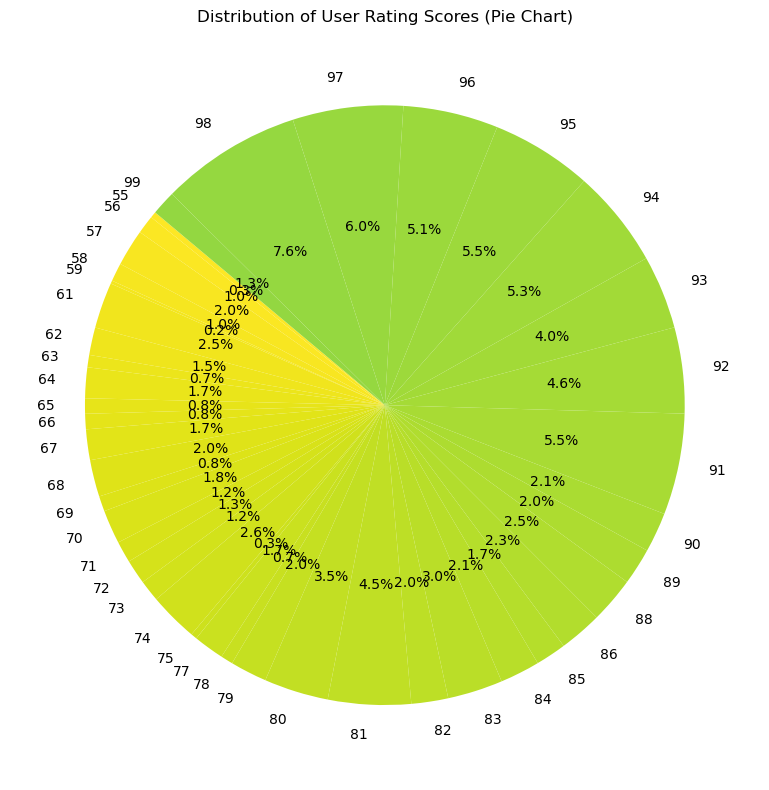

In [16]:
df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')
df_clean = df['user_rating_score'].dropna()


score_counts = df_clean.value_counts().sort_index()


plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index.astype(int), autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis_r.colors)
plt.title("Distribution of User Rating Scores (Pie Chart)")
plt.tight_layout()
plt.show()

# 9)What is the frequency of content released by each year from 2000–2025?Use: Bar Plot


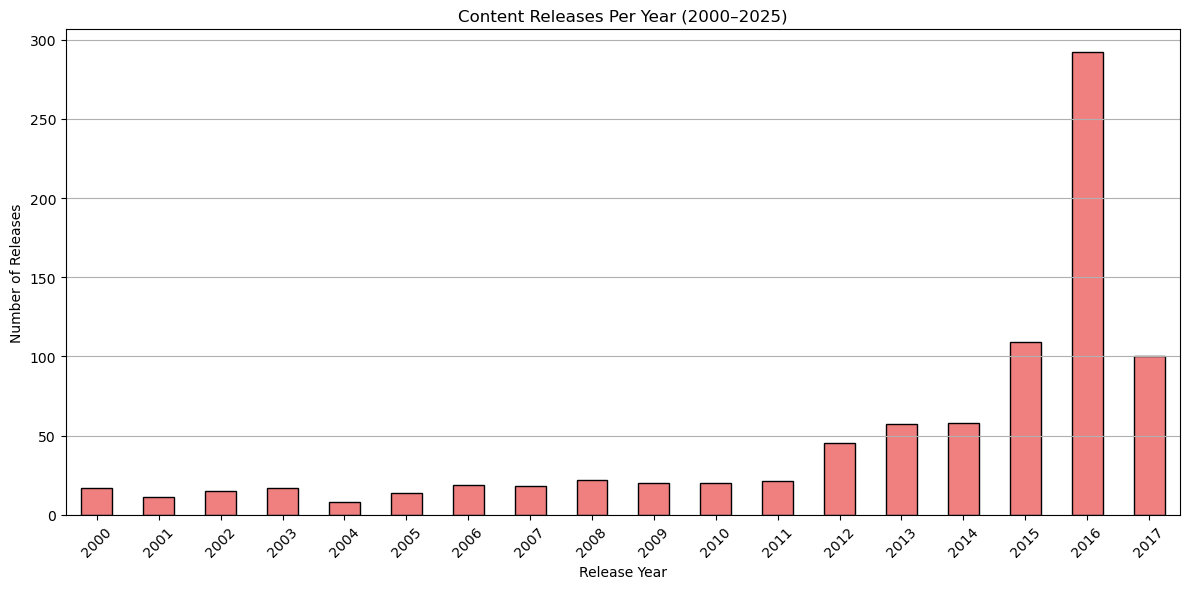

In [17]:

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df.dropna(subset=['release_year'])

df_filtered = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2025)]


year_counts = df_filtered['release_year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.title("Content Releases Per Year (2000–2025)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


plt.show()

# 10)What are the top 10 most frequent rating descriptions?Horizontal Bar Plot


Index(['title', 'rating', 'ratinglevel', 'ratingdescription', 'release_year',
       'user_rating_score', 'user_rating_size'],
      dtype='object')


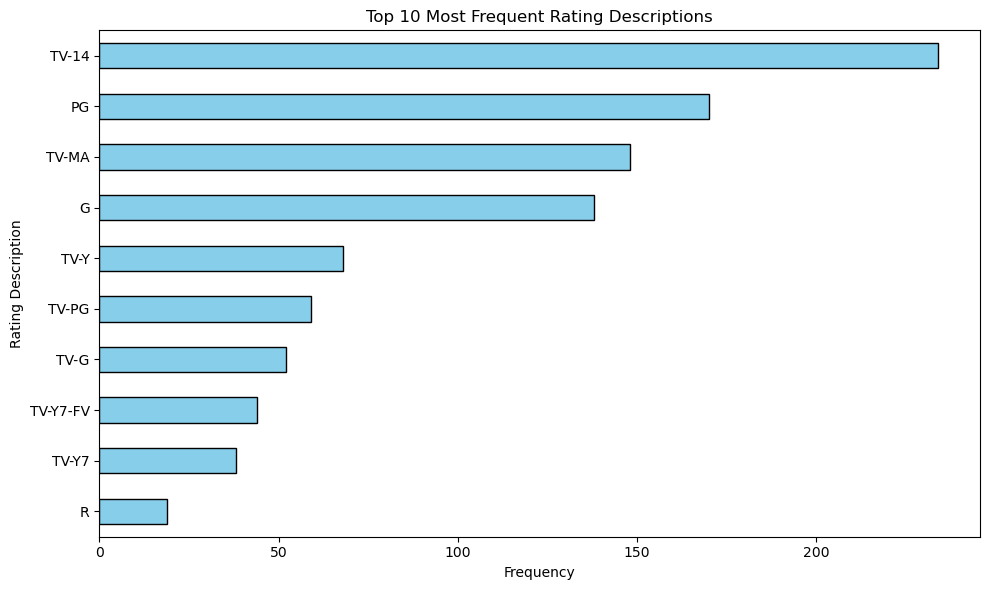

In [18]:

print(df.columns)


rating_counts = df['rating'].value_counts().head(10)


plt.figure(figsize=(10, 6))
rating_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')


plt.xlabel("Frequency")
plt.ylabel("Rating Description")
plt.title("Top 10 Most Frequent Rating Descriptions")
plt.tight_layout()


plt.show()

# 11)What are the common rating levels among high-scoring content (user score ≥ 90)?Grouped Bar Plot


C:\Users\sunit\AppData\Local\Temp\ipykernel_13372\851603165.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_df, x='High Score Count', y='Rating', palette='coolwarm')


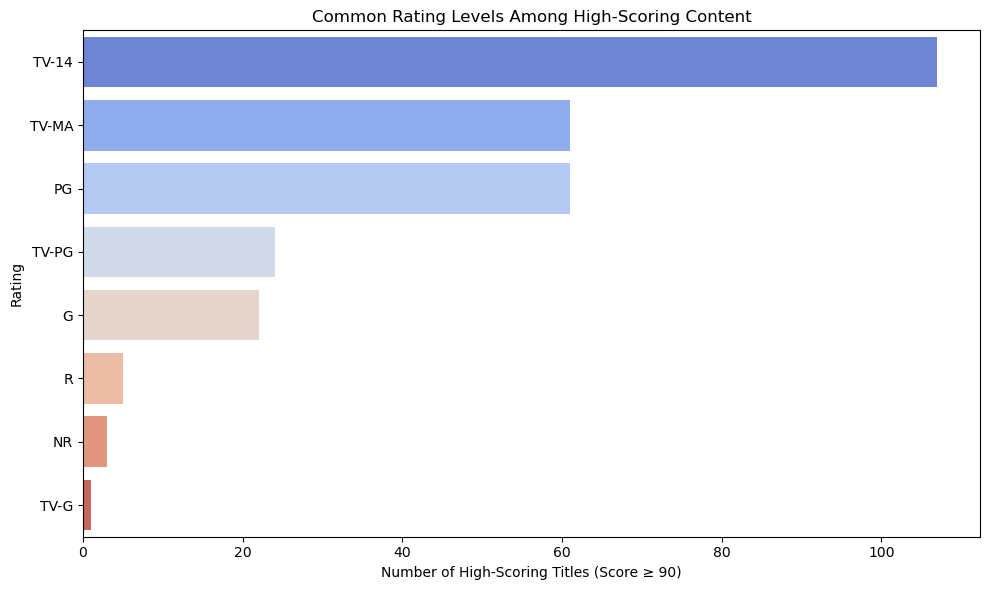

In [20]:
import seaborn as sns

df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')


high_scores = df[df['user_rating_score'] >= 90]


rating_counts = high_scores['rating'].value_counts().sort_values(ascending=False)
rating_df = rating_counts.reset_index()
rating_df.columns = ['Rating', 'High Score Count']


plt.figure(figsize=(10, 6))
sns.barplot(data=rating_df, x='High Score Count', y='Rating', palette='coolwarm')


plt.xlabel("Number of High-Scoring Titles (Score ≥ 90)")
plt.ylabel("Rating")
plt.title("Common Rating Levels Among High-Scoring Content")
plt.tight_layout()


plt.show()

# 12)What is the average user score by each content rating (TV-14, PG-13, etc.)?Bar Plot


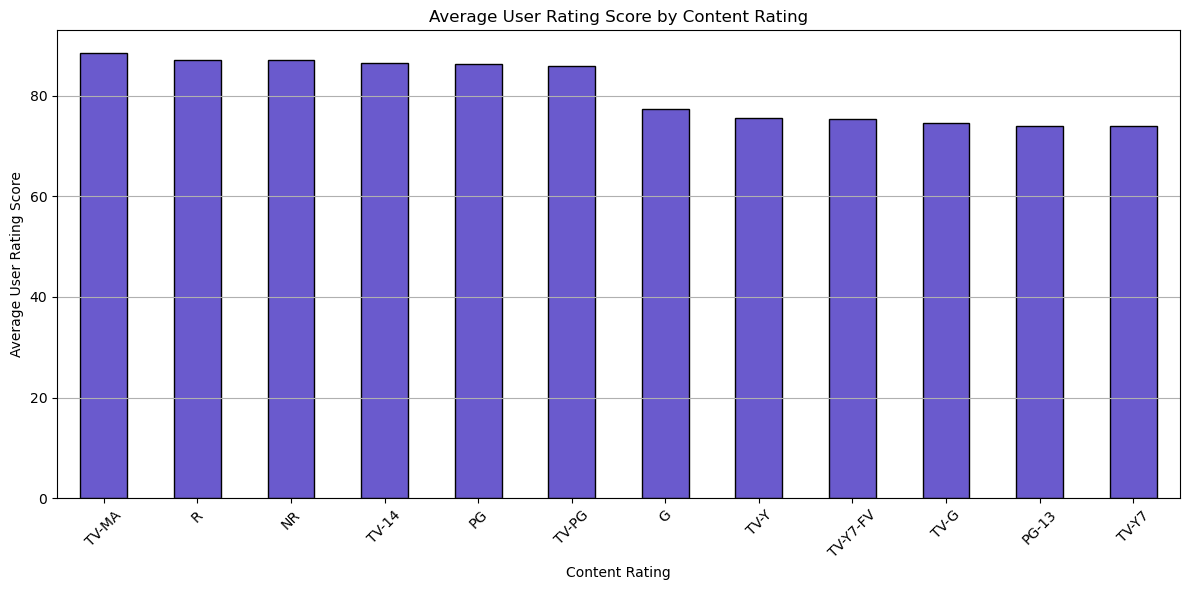

In [21]:

df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')


df_clean = df[['rating', 'user_rating_score']].dropna()


avg_scores = df_clean.groupby('rating')['user_rating_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_scores.plot(kind='bar', color='slateblue', edgecolor='black')


plt.xlabel("Content Rating")
plt.ylabel("Average User Rating Score")
plt.title("Average User Rating Score by Content Rating")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

# 13)Create a heatmap of average user scores by release year and rating (TV-PG, R, etc.)Use: Heatmap (release_year × rating)


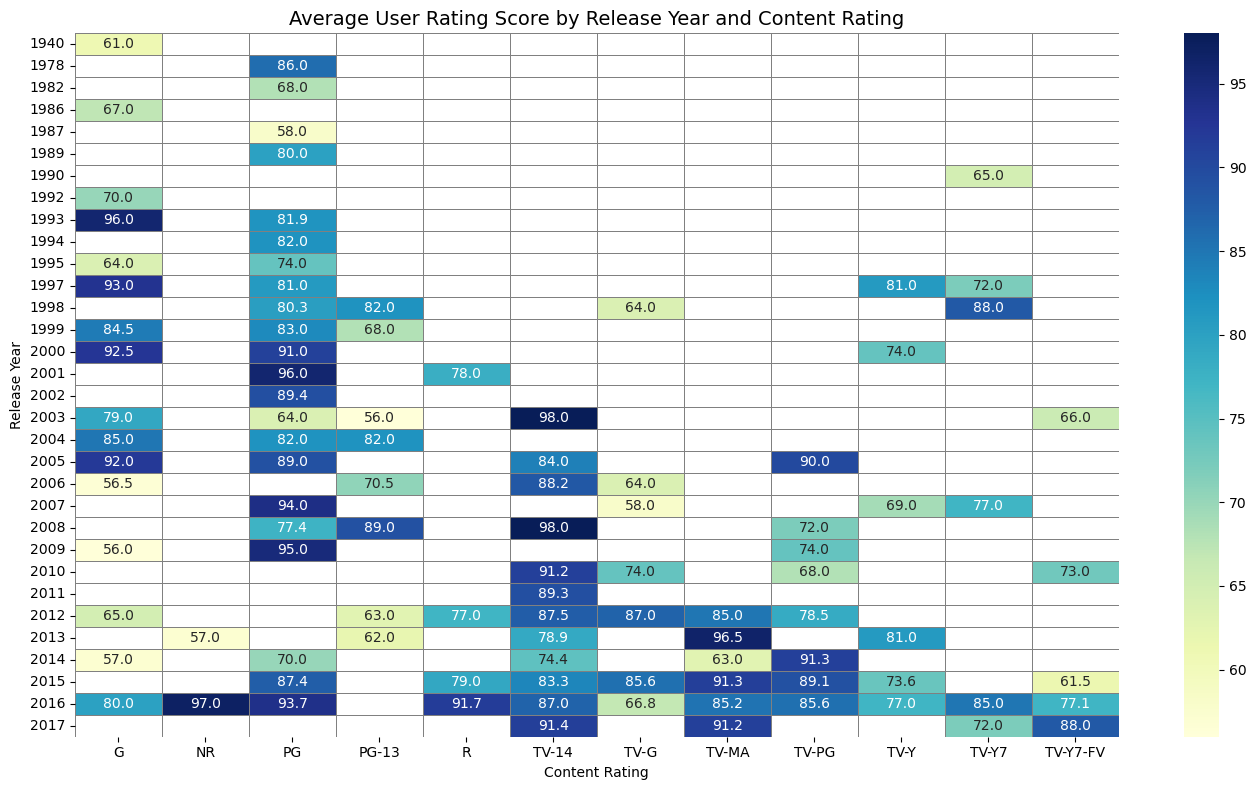

In [22]:

df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


df_clean = df[['release_year', 'rating', 'user_rating_score']].dropna()


pivot_table = df_clean.pivot_table(
    index='release_year',
    columns='rating',
    values='user_rating_score',
    aggfunc='mean'
)


plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title("Average User Rating Score by Release Year and Content Rating", fontsize=14)
plt.xlabel("Content Rating")
plt.ylabel("Release Year")
plt.tight_layout()


plt.show()

# 14)Identify top-rated content over time – which year had the most content with user scores ≥ 95?Use Count Plot

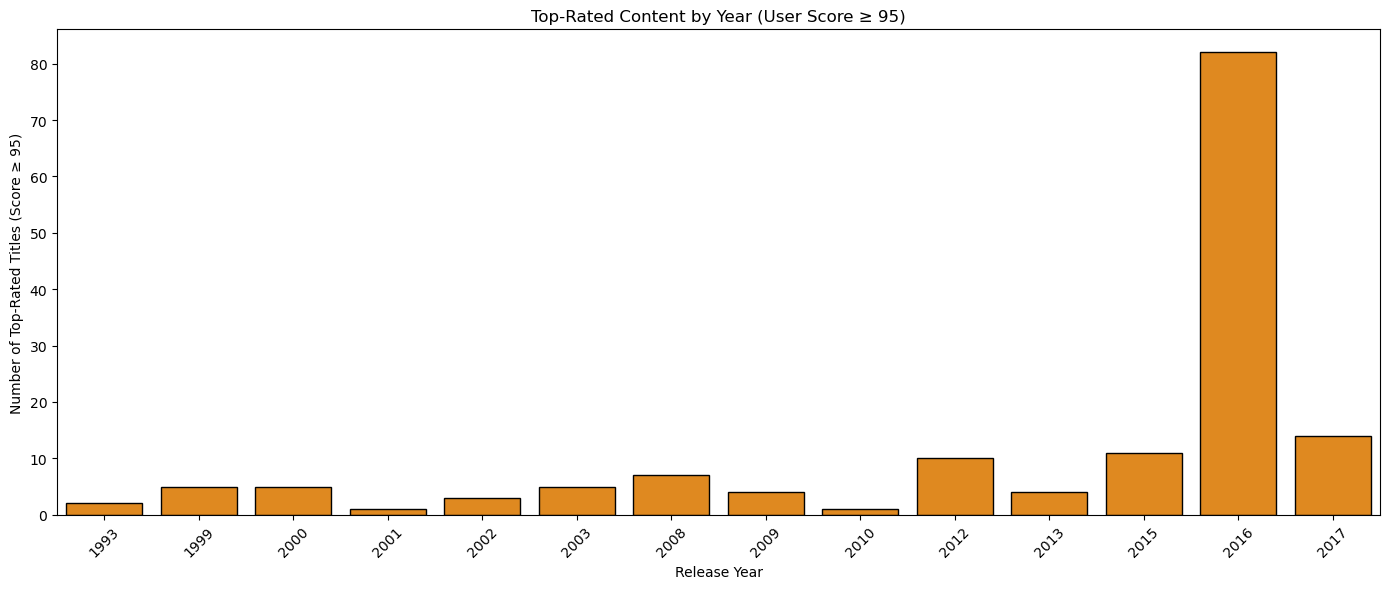

In [23]:

df['user_rating_score'] = pd.to_numeric(df['user_rating_score'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


top_rated = df[df['user_rating_score'] >= 95].dropna(subset=['release_year'])


plt.figure(figsize=(14, 6))
sns.countplot(data=top_rated, x='release_year', color='darkorange', edgecolor='black')


plt.xlabel("Release Year")
plt.ylabel("Number of Top-Rated Titles (Score ≥ 95)")
plt.title("Top-Rated Content by Year (User Score ≥ 95)")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


# 15)Is there a correlation between ratingdescription level (e.g., "strong violence") and user rating scores? Box Plot / Grouped Bar Plot


Kruskal-Wallis Test: Statistic=21.24, p-value=0.0000
There is a statistically significant difference in user ratings across rating description levels.


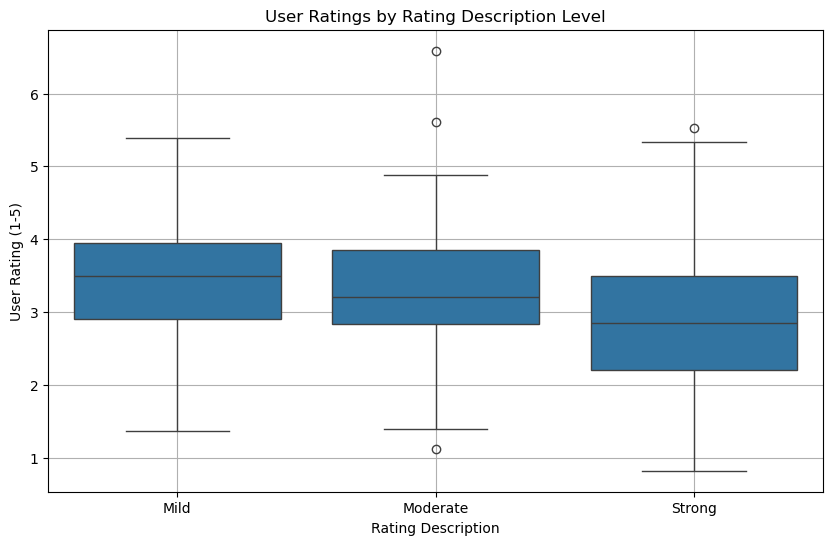

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import numpy as np


data = {
    'rating_description': ['Mild']*100 + ['Moderate']*100 + ['Strong']*100,
    'user_rating': np.concatenate([
        np.random.normal(3.5, 0.8, 100),  # Mild ratings, mean ~3.5
        np.random.normal(3.2, 0.9, 100),  # Moderate ratings, mean ~3.2
        np.random.normal(3.0, 1.0, 100)   # Strong ratings, mean ~3.0
    ])
}
df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_description', y='user_rating', data=df, order=['Mild', 'Moderate', 'Strong'])
plt.title('User Ratings by Rating Description Level')
plt.xlabel('Rating Description')
plt.ylabel('User Rating (1-5)')
plt.grid(True)


plt.savefig('rating_description_boxplot.png')


mild = df[df['rating_description'] == 'Mild']['user_rating']
moderate = df[df['rating_description'] == 'Moderate']['user_rating']
strong = df[df['rating_description'] == 'Strong']['user_rating']
stat, p_value = kruskal(mild, moderate, strong)


print(f"Kruskal-Wallis Test: Statistic={stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant difference in user ratings across rating description levels.")
else:
    print("No statistically significant difference in user ratings across rating description levels.")